# Bitcoin Trader Performance vs Market Sentiment Analysis

Fear & Greed Dataset:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05 

Trader Dataset:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       

/tmp/ipython-input-1231941642.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="classification", y="Closed PnL", data=avg_profit, palette="coolwarm", ax=axs[0,0])
/tmp/ipython-input-1231941642.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="classification", y="Win", data=win_rate, palette="viridis", ax=axs[0,1])
/tmp/ipython-input-1231941642.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="classification", y="Trade ID", data=trade_activity, palette="plasma", ax=axs[1,0])


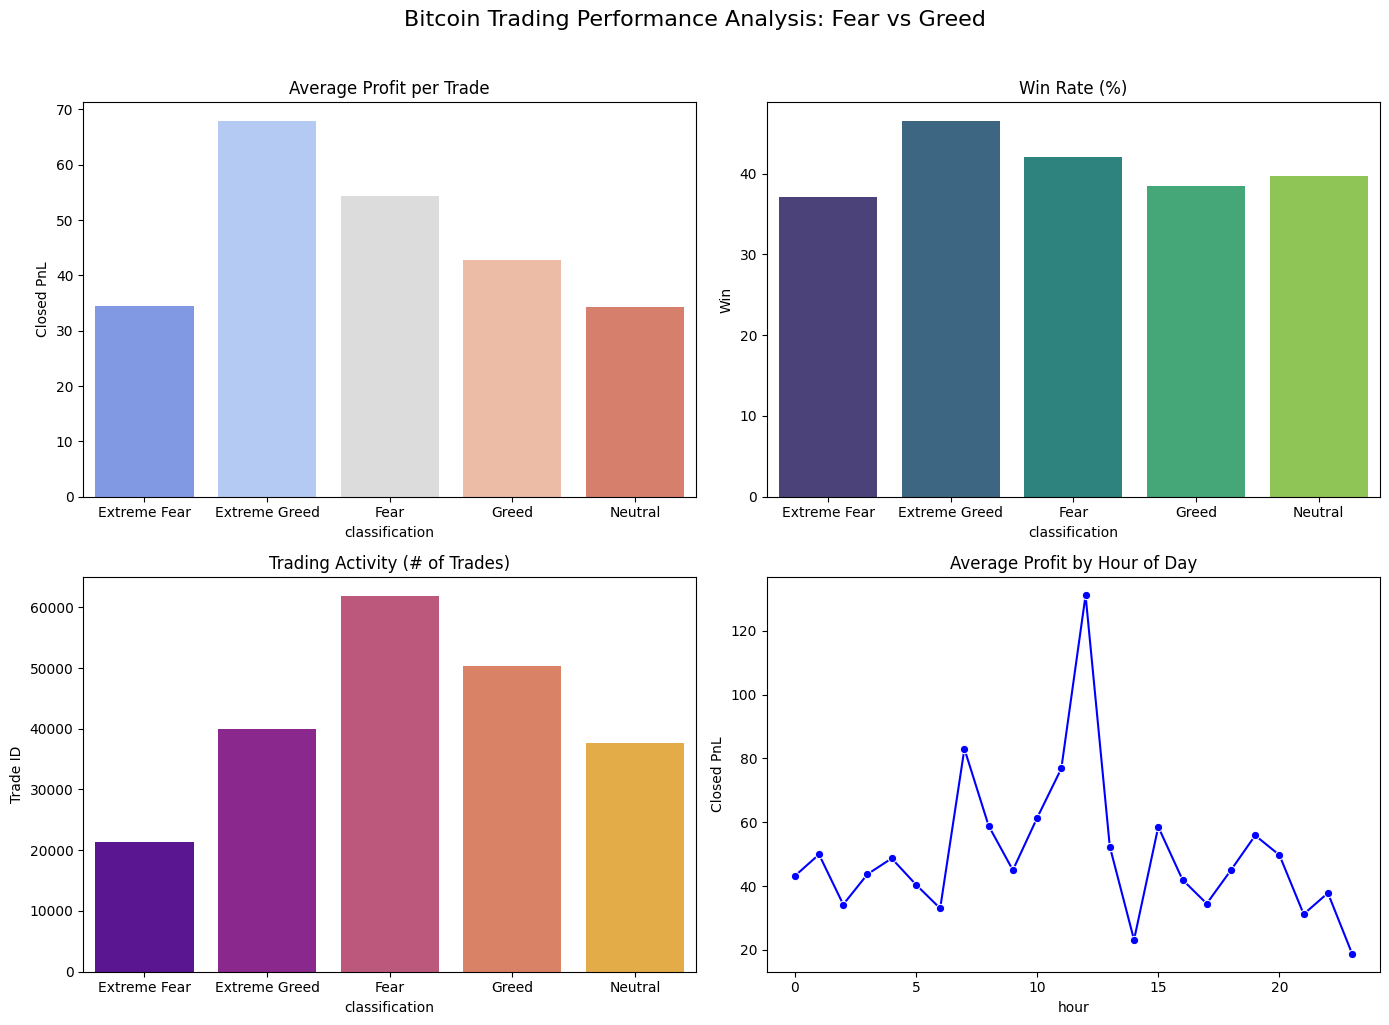

/tmp/ipython-input-1231941642.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Closed PnL", y="Account", data=top_traders, palette="mako", ax=axs[0])
/tmp/ipython-input-1231941642.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day_of_week", y="Closed PnL", data=dow_profit, palette="coolwarm", ax=axs[1])


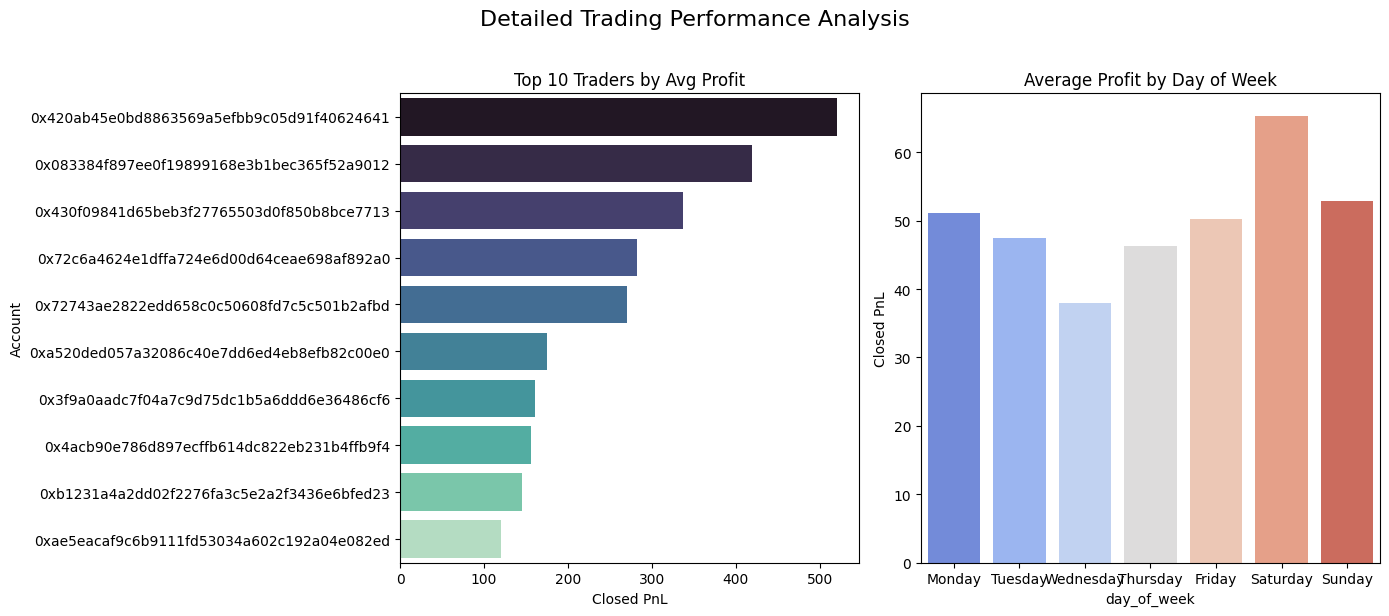

=== KEY INSIGHTS ===
1. Do traders make more money during Fear or Greed?
  classification  Closed PnL
0   Extreme Fear   34.537862
1  Extreme Greed   67.892861
2           Fear   54.290400
3          Greed   42.743559
4        Neutral   34.307718

2. What's the win rate in each condition?
  classification        Win
0   Extreme Fear  37.060748
1  Extreme Greed  46.494299
2           Fear  42.076750
3          Greed  38.482794
4        Neutral  39.699093

3. Who are the best traders?
                                       Account  Closed PnL
8   0x420ab45e0bd8863569a5efbb9c05d91f40624641  520.902331
0   0x083384f897ee0f19899168e3b1bec365f52a9012  419.127768
9   0x430f09841d65beb3f27765503d0f850b8bce7713  336.735548
16  0x72c6a4624e1dffa724e6d00d64ceae698af892a0  281.826227
15  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  270.034947
24  0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0  174.691809
7   0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6  161.133275
11  0x4acb90e786d897ecffb614dc822eb231b4

In [3]:
# STEP 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: Load datasets and Check structure
fear_greed = pd.read_csv("fear_greed_index.csv")
trader_data = pd.read_csv("historical_trader_data.csv")
print("Fear & Greed Dataset:")
print(fear_greed.head(), "\n")
print("Trader Dataset:")
print(trader_data.head(), "\n")

# STEP 3: Format dates
fear_greed['date'] = pd.to_datetime(fear_greed['date'])
trader_data['Timestamp IST'] = pd.to_datetime(trader_data['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')
trader_data['date'] = trader_data['Timestamp IST'].dt.date
trader_data['date'] = pd.to_datetime(trader_data['date'])

# STEP 4: Merge datasets
merged = pd.merge(trader_data, fear_greed, on="date", how="left")
print("Merged Dataset:")
print(merged.head())
print("-----------------------------------------------------------------------------------------------------------------------")

# Save merged dataset
merged.to_csv("merged_trading_data.csv", index=False)

# Add extra columns
merged['hour'] = merged['Timestamp IST'].dt.hour
merged['day_of_week'] = merged['Timestamp IST'].dt.day_name()
merged['Win'] = merged["Closed PnL"] > 0

# ---------------------------
# KEY CALCULATIONS
# ---------------------------

# Average profit per sentiment
avg_profit = merged.groupby("classification")["Closed PnL"].mean().reset_index()

# Win rate (%)
win_rate = merged.groupby("classification")["Win"].mean().reset_index()
win_rate["Win"] = win_rate["Win"] * 100

# Trade counts
trade_activity = merged.groupby("classification")["Trade ID"].count().reset_index()

# Profit by hour
hourly_profit = merged.groupby("hour")["Closed PnL"].mean().reset_index()

# Profit by day of week
dow_profit = merged.groupby("day_of_week")["Closed PnL"].mean().reset_index()
days_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
dow_profit["day_of_week"] = pd.Categorical(dow_profit["day_of_week"], categories=days_order, ordered=True)
dow_profit = dow_profit.sort_values("day_of_week")

# Top traders
top_traders = merged.groupby("Account")["Closed PnL"].mean().reset_index().sort_values("Closed PnL", ascending=False).head(10)
top_traders.to_csv("top_traders.csv", index=False)

# Save summary statistics
sentiment_summary = pd.merge(avg_profit, win_rate, on="classification")
sentiment_summary = pd.merge(sentiment_summary, trade_activity, on="classification")
sentiment_summary.to_csv("sentiment_summary.csv", index=False)

# ---------------------------
# VISUALIZATIONS
# ---------------------------

# === 1. sentiment_analysis_overview.png ===
fig, axs = plt.subplots(2,2, figsize=(14,10))

# Profit per trade
sns.barplot(x="classification", y="Closed PnL", data=avg_profit, palette="coolwarm", ax=axs[0,0])
axs[0,0].set_title("Average Profit per Trade")

# Win Rate
sns.barplot(x="classification", y="Win", data=win_rate, palette="viridis", ax=axs[0,1])
axs[0,1].set_title("Win Rate (%)")

# Trading Activity
sns.barplot(x="classification", y="Trade ID", data=trade_activity, palette="plasma", ax=axs[1,0])
axs[1,0].set_title("Trading Activity (# of Trades)")

# Best Hours
sns.lineplot(x="hour", y="Closed PnL", data=hourly_profit, marker="o", color="blue", ax=axs[1,1])
axs[1,1].set_title("Average Profit by Hour of Day")

plt.suptitle("Bitcoin Trading Performance Analysis: Fear vs Greed", fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig("sentiment_analysis_overview.png")
plt.show()

# === 2. detailed_analysis.png ===
fig, axs = plt.subplots(1,2, figsize=(14,6))

# Top Traders
sns.barplot(x="Closed PnL", y="Account", data=top_traders, palette="mako", ax=axs[0])
axs[0].set_title("Top 10 Traders by Avg Profit")

# Best Days of Week
sns.barplot(x="day_of_week", y="Closed PnL", data=dow_profit, palette="coolwarm", ax=axs[1])
axs[1].set_title("Average Profit by Day of Week")

plt.suptitle("Detailed Trading Performance Analysis", fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig("detailed_analysis.png")
plt.show()

# ---------------------------
# PRINT KEY QUESTIONS ANSWERS
# ---------------------------

print("=== KEY INSIGHTS ===")
print("1. Do traders make more money during Fear or Greed?")
print(avg_profit)

print("\n2. What's the win rate in each condition?")
print(win_rate)

print("\n3. Who are the best traders?")
print(top_traders)

print("\n4. When is the best time to trade?")
print("By hour:\n", hourly_profit.sort_values("Closed PnL", ascending=False).head(3))
print("\nBy day of week:\n", dow_profit.sort_values("Closed PnL", ascending=False).head(3))


In [ ]:
# Install Gradio if not installed
!pip install gradio --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

# Load merged dataset (make sure you already saved merged_trading_data.csv earlier)
merged = pd.read_csv("merged_trading_data.csv")

# Add helper columns
merged['Win'] = merged["Closed PnL"] > 0
if "Timestamp IST" in merged.columns:
    merged['Timestamp IST'] = pd.to_datetime(merged['Timestamp IST'], errors="coerce")
    merged['hour'] = merged['Timestamp IST'].dt.hour
    merged['day_of_week'] = merged['Timestamp IST'].dt.day_name()

# Precompute metrics
avg_profit = merged.groupby("classification")["Closed PnL"].mean().reset_index()
win_rate = merged.groupby("classification")["Win"].mean().reset_index()
win_rate["Win"] = win_rate["Win"] * 100
top_traders = merged.groupby("Account")["Closed PnL"].mean().reset_index().sort_values("Closed PnL", ascending=False).head(10)
hourly_profit = merged.groupby("hour")["Closed PnL"].mean().reset_index()
dow_profit = merged.groupby("day_of_week")["Closed PnL"].mean().reset_index()

# Order weekdays
days_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
dow_profit["day_of_week"] = pd.Categorical(dow_profit["day_of_week"], categories=days_order, ordered=True)
dow_profit = dow_profit.sort_values("day_of_week")

# Function that answers + plots
def answer_question(question):
    q = question.lower()
    fig = None
    answer = ""

    if "fear" in q or "greed" in q:
        best = avg_profit.sort_values("Closed PnL", ascending=False).iloc[0]
        answer = f"✅ Traders make more money during **{best['classification']}** days.\n\nBreakdown:\n{avg_profit.to_string(index=False)}"

        # Plot
        fig, ax = plt.subplots(figsize=(6,4))
        sns.barplot(x="classification", y="Closed PnL", data=avg_profit, palette="coolwarm", ax=ax)
        ax.set_title("Average Profit per Trade: Fear vs Greed")

    elif "win rate" in q:
        answer = f"✅ Win Rates by Market Sentiment:\n{win_rate.to_string(index=False)}"

        fig, ax = plt.subplots(figsize=(6,4))
        sns.barplot(x="classification", y="Win", data=win_rate, palette="viridis", ax=ax)
        ax.set_title("Win Rate by Sentiment")

    elif "top traders" in q or "best traders" in q:
        answer = f"✅ Top 10 Traders by Average Profit:\n{top_traders.to_string(index=False)}"

        fig, ax = plt.subplots(figsize=(6,4))
        sns.barplot(x="Closed PnL", y="Account", data=top_traders, palette="mako", ax=ax)
        ax.set_title("Top 10 Traders by Avg Profit")

    elif "hour" in q or "time" in q:
        best_hour = hourly_profit.sort_values("Closed PnL", ascending=False).iloc[0]
        answer = f"✅ Best Trading Hour: {int(best_hour['hour'])}:00 with avg profit {best_hour['Closed PnL']:.2f}\n\nHourly Breakdown:\n{hourly_profit.to_string(index=False)}"

        fig, ax = plt.subplots(figsize=(6,4))
        sns.lineplot(x="hour", y="Closed PnL", data=hourly_profit, marker="o", ax=ax)
        ax.set_title("Average Profit by Hour of Day")

    elif "day" in q or "weekday" in q:
        best_day = dow_profit.sort_values("Closed PnL", ascending=False).iloc[0]
        answer = f"✅ Best Day to Trade: {best_day['day_of_week']} with avg profit {best_day['Closed PnL']:.2f}\n\nDay-wise Breakdown:\n{dow_profit.to_string(index=False)}"

        fig, ax = plt.subplots(figsize=(6,4))
        sns.barplot(x="day_of_week", y="Closed PnL", data=dow_profit, palette="coolwarm", ax=ax)
        ax.set_title("Average Profit by Day of Week")

    else:
        answer = "❌ Sorry, I didn’t understand. Try asking about:\n- Profit in Fear vs Greed\n- Win Rate\n- Top Traders\n- Best Hour\n- Best Day"

    return answer, fig

# Gradio interface
interface = gr.Interface(
    fn=answer_question,
    inputs=gr.Textbox(lines=2, placeholder="Ask a question about Bitcoin Trader Sentiment Analysis..."),
    outputs=["text", "plot"],
    title="💹 Bitcoin Trader Sentiment Analysis Q&A",
    description="Ask questions like:\n- Do traders make more profit in Fear or Greed?\n- What’s the win rate?\n- Who are the top traders?\n- What’s the best trading hour?\n- What’s the best day of the week?"
)

interface.launch(debug=True)
